In [1]:
# Necessary library
import numpy as np
# from tqdm.notebook import trange
from tqdm import trange
from matplotlib import pyplot as plt

In [2]:
# Import datasets
datasets_dir = "./datasets/"

# MNIST
from keras.datasets import mnist
(mnist_data_train, mnist_label_train), (mnist_data_test, mnist_label_test) = mnist.load_data()

# Iris
iris_label_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
iris = np.genfromtxt(datasets_dir + "iris.csv", delimiter = ",", converters = {-1 : lambda label : iris_label_mapping[label.decode()]})
iris_label = iris[:, -1]
iris_data = iris[:, 0:-1]

# Pima
pima = np.genfromtxt(datasets_dir + "pima-indians-diabetes.csv", delimiter = ",")
pima_label = pima[:, -1]
pima_data = pima[:, :-1]

# Sonar
sonar_mapping = {"R": 0, "M": 1}
sonar = np.genfromtxt(datasets_dir + "sonar.csv", delimiter = ",", converters = {-1 : lambda label : sonar_mapping[label.decode()]})
sonar_label = sonar[:, -1]
sonar_data = sonar[:, :-1]

/Users/william/anaconda3/envs/machine-poet/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/william/anaconda3/envs/machine-poet/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/william/anaconda3/envs/machine-poet/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np

In [3]:
# Flatten MNIST
mnist_data_train_flatten = mnist_data_train.reshape((mnist_data_train.shape[0], -1))
mnist_data_test_flatten = mnist_data_test.reshape((mnist_data_test.shape[0], -1))

In [4]:
# Utility functions

# Visulization of dataset
def data_viz(x, y, label=[0]):
    color_strings = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    plt.scatter(x, y, c = [color_strings[int(i)] for i in label])

# Dataset partition for train and test data
def data_partition(data, label, test_ratio = 0.3):
    numRows = data.shape[0]
    cutoff = int(numRows * (1 - 0.3))
    dataset = np.concatenate((data, label.reshape(len(label), 1)), axis = 1)
    np.random.shuffle(dataset)
    train_data, test_data = dataset[:cutoff, :-1], dataset[cutoff:, :-1]
    train_label, test_label = dataset[:cutoff, -1], dataset[cutoff:, -1]
    return (train_data, train_label), (test_data, test_label)


In [5]:
"""
data_viz(sonar_data[:,3], sonar_data[:,2], sonar_label)
(train_data, train_label), (test_data, test_label) = data_partition(iris_data, iris_label)
"""

'\ndata_viz(sonar_data[:,3], sonar_data[:,2], sonar_label)\n(train_data, train_label), (test_data, test_label) = data_partition(iris_data, iris_label)\n'

In [6]:
# Dataset selection
(train_data, train_label), (test_data, test_label) = data_partition(pima_data, pima_label, test_ratio = 0.3)

# For mnist only
# train_data = mnist_data_train_flatten
# train_label = mnist_label_train
# test_data = mnist_data_test_flatten
# test_label = mnist_label_test

In [7]:
# Import model
import sys
sys.path.append("./models")
from models.perceptron import perceptron, perceptron_dual

# Initialize model
target_label = 1
percep = perceptron(train_data[0, :], target_label = target_label)
# percep_dual = perceptron_dual(train_data[0, :], target_label = target_label)

In [8]:
# General model calling
# Models are defined as classes
# Currently no batch ops

loss_step = 100
epochs = 10


percep.config(0.0003)
percep_dual.config(0.0003)

# Train on normal perceptron model
"""
for epoch in range(epochs):
    for i in trange(train_data.shape[0], desc = "Training steps"):
        # print(percep.bias)
        percep.train(train_data[i], train_label[i])
        if i % loss_step == 0:
            # Print loss
            print("Epoch: {}\tLoss: {}\tStep: {}".format(epoch + 1, percep.get_loss(), i))
"""

# Dual of perceptron
percep_dual.train(train_data, train_label)

Steps: 100%|██████████| 537/537 [00:00<00:00, 26168.11it/s]


In [9]:
# Evaluate
percep.evaluate(test_data, test_label)

100%|██████████| 231/231 [00:00<00:00, 96014.69it/s]


Accuracy: 61.04%	Correct: 141	Incorrect: 90


In [145]:
# Predict
size = test_data.shape[0]
index = np.random.randint(0, size)
label = test_label[index]
label = 1 if label == target_label else -1
print("Prediction: {}\t True Label: {}".format(percep.predict(test_data[index])[0], label))

Prediction: 1.0	 True Label: -1


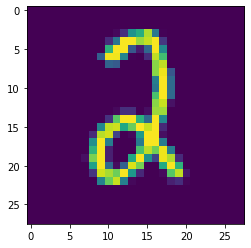

In [146]:
# Plot mnist
plt.imshow(test_data[index].reshape((28, 28)))